# Cuarta lista - Problema grupal 4

## Componentes del grupo

* Pol Casacuberta Gil
* Joaquin Faraone Prieto
* Agnès Felip i Díaz
* Marta Granero I Martí


## Predecirme a mí mismo

### Una de las cosas interesantes de las redes neuronales es que se pueden usar fácilmente para muchas tareas además de la clasificación y la regresión clásicas, dado que pueden representar cualquier tipo de función. Una posibilidad es implementar la función de identidad, básicamente una red que es capaz de predecir su entrada.

### Obviamente, la idea no es solo copiar la entrada, sino aprender una representación que pueda usarse para otros fines. Este tipo de red se llama *auto-codficador (autoencoder)*. La arquitectura de dicha red crea un cuello de botella en las capas ocultas, reduciendo el número de neuronas en cada capa hasta alcanzar un mínimo que corresponde a la dimensionalidad del espacio de representación de destino y luego va haciendo crecer el tamaño de las capas en orden inverso hasta tener una capa de salida que tiene la dimensionalidad de la entrada.

### El objetivo de este problema es implementar un auto-codificador y probarlo con el conjunto de datos $\texttt{dígits}$ que forma parte de los conjuntos de datos de scikit-learn ($\texttt{load_digits}$). Estos son dígitos escritos a mano transformados en imágenes de tamaño 8×8 representados como vectores de 64 elementos con valores en el rango [0,15] (escala de grises).

### El siguiente código implementa un auto-codificador usando keras/tensorflow:

``` python
act = 'linear'
entrada = keras.Input(shape=(64,))
codificar = keras.layers.Dense(d1, activation=act)(entrada)
codificar = keras.layers.Dense(d2, activation=actuar)(codificar)
decodificar = keras.layers.Dense(d1, activation=actuar)(codificar)
decodificar = keras.layers.Dense(64, activation=actuar)(decodificar)
autocodificador = keras.Model(entrada, decodificar)
codificador = keras.Model(entrada, codificar)
```

### La red tiene capas de entrada y salida de tamaño 64 (el tamaño de los dígitos de ejemplo) y tres capas ocultas densas (MLP), dos capas gemelas con un tamaño más pequeño que la entrada y una capa intermedia con un tamaño de la dimensionalidad del espacio de codificación. Por ejemplo (16,2,16) será una red que primero reduce la dimensionalidad a un 25 % de la entrada, obtiene un espacio bidimensional y luego aumenta la dimensionalidad hasta volver a la dimensionalidad de los datos.
### Para entrenar la red solo tenéis que definir el optimizador y la funcion de pérdida y luego ajustar los datos de la siguiente manera:

```python
autocodificador.compile(optimizer=keras.optimizers.Adam(),
                        loss=keras.losses.MeanSquaredError())
autocodificador.fit(X_train, X_train,batch_size=BATCH_SIZE,
                             epochs=EPOCHS, verbose=False)
```

### La pérdida será el error al cuadrático, el optimizador adam. Podéis ver que al ajustar el auto-codificador, la entrada y la salida son los mismos datos. El tamaño de $\texttt{BATCH}$ y el número de $\texttt{EPOCHS}$ son hiperparámetros. Una vez entrenamos el $\texttt{autocodificador}$, la red $\texttt{codificador}$ (que es solo la primera parte del auto-codificador) se puede usar para transformar los datos al espacio de menor dimensionalidad.

### Procedemos a realizar los ejercicios que se nos piden




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import math
from statistics import mean
import tensorflow as tf
from tensorflow import keras


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import  ConfusionMatrixDisplay,classification_report,\
                             RocCurveDisplay, PrecisionRecallDisplay,\
                             accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import train_test_split,  KFold, cross_val_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler, Binarizer
from sklearn.decomposition import PCA

from sklearn.datasets import load_digits

#### Cargamos el conjunto de datos de la librería de sklearn

In [2]:
digits_data = load_digits(as_frame=True)
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
X = digits_data.data
y = digits_data.target

X = pd.DataFrame(X)
y = pd.DataFrame(y)

print(X.shape, y.shape)
print(X.columns, y.columns)

#falta definir la seed de tf, keras y numpy sino salen resultados diferentes en las ejecucions de cada modelo

(1797, 64) (1797, 1)
Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object') Index(['target'], dtype='object')

In [3]:
X.info(), y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 64 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

(None, None)

In [4]:
X.describe(include='all')

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [5]:
y.describe(include='all')

,target
count,1797.000000
mean,4.490818
std,2.865304
min,0.000000
25%,2.000000
50%,4.000000
75%,7.000000
max,9.000000


#### Dividimos el conjunto de datos en entrenamiento y test

In [35]:
#hemos de asegurarnos que los ejemplos estan correctamente etiquetados tq los índices de ambos (X,y) corresponden -> inner merge
digits_data_merge = pd.merge(X, y, left_index=True, right_index=True)
X = digits_data_merge.loc[:,digits_data_merge.columns != 'target']
y = digits_data_merge['target']

#digits_data_merge.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

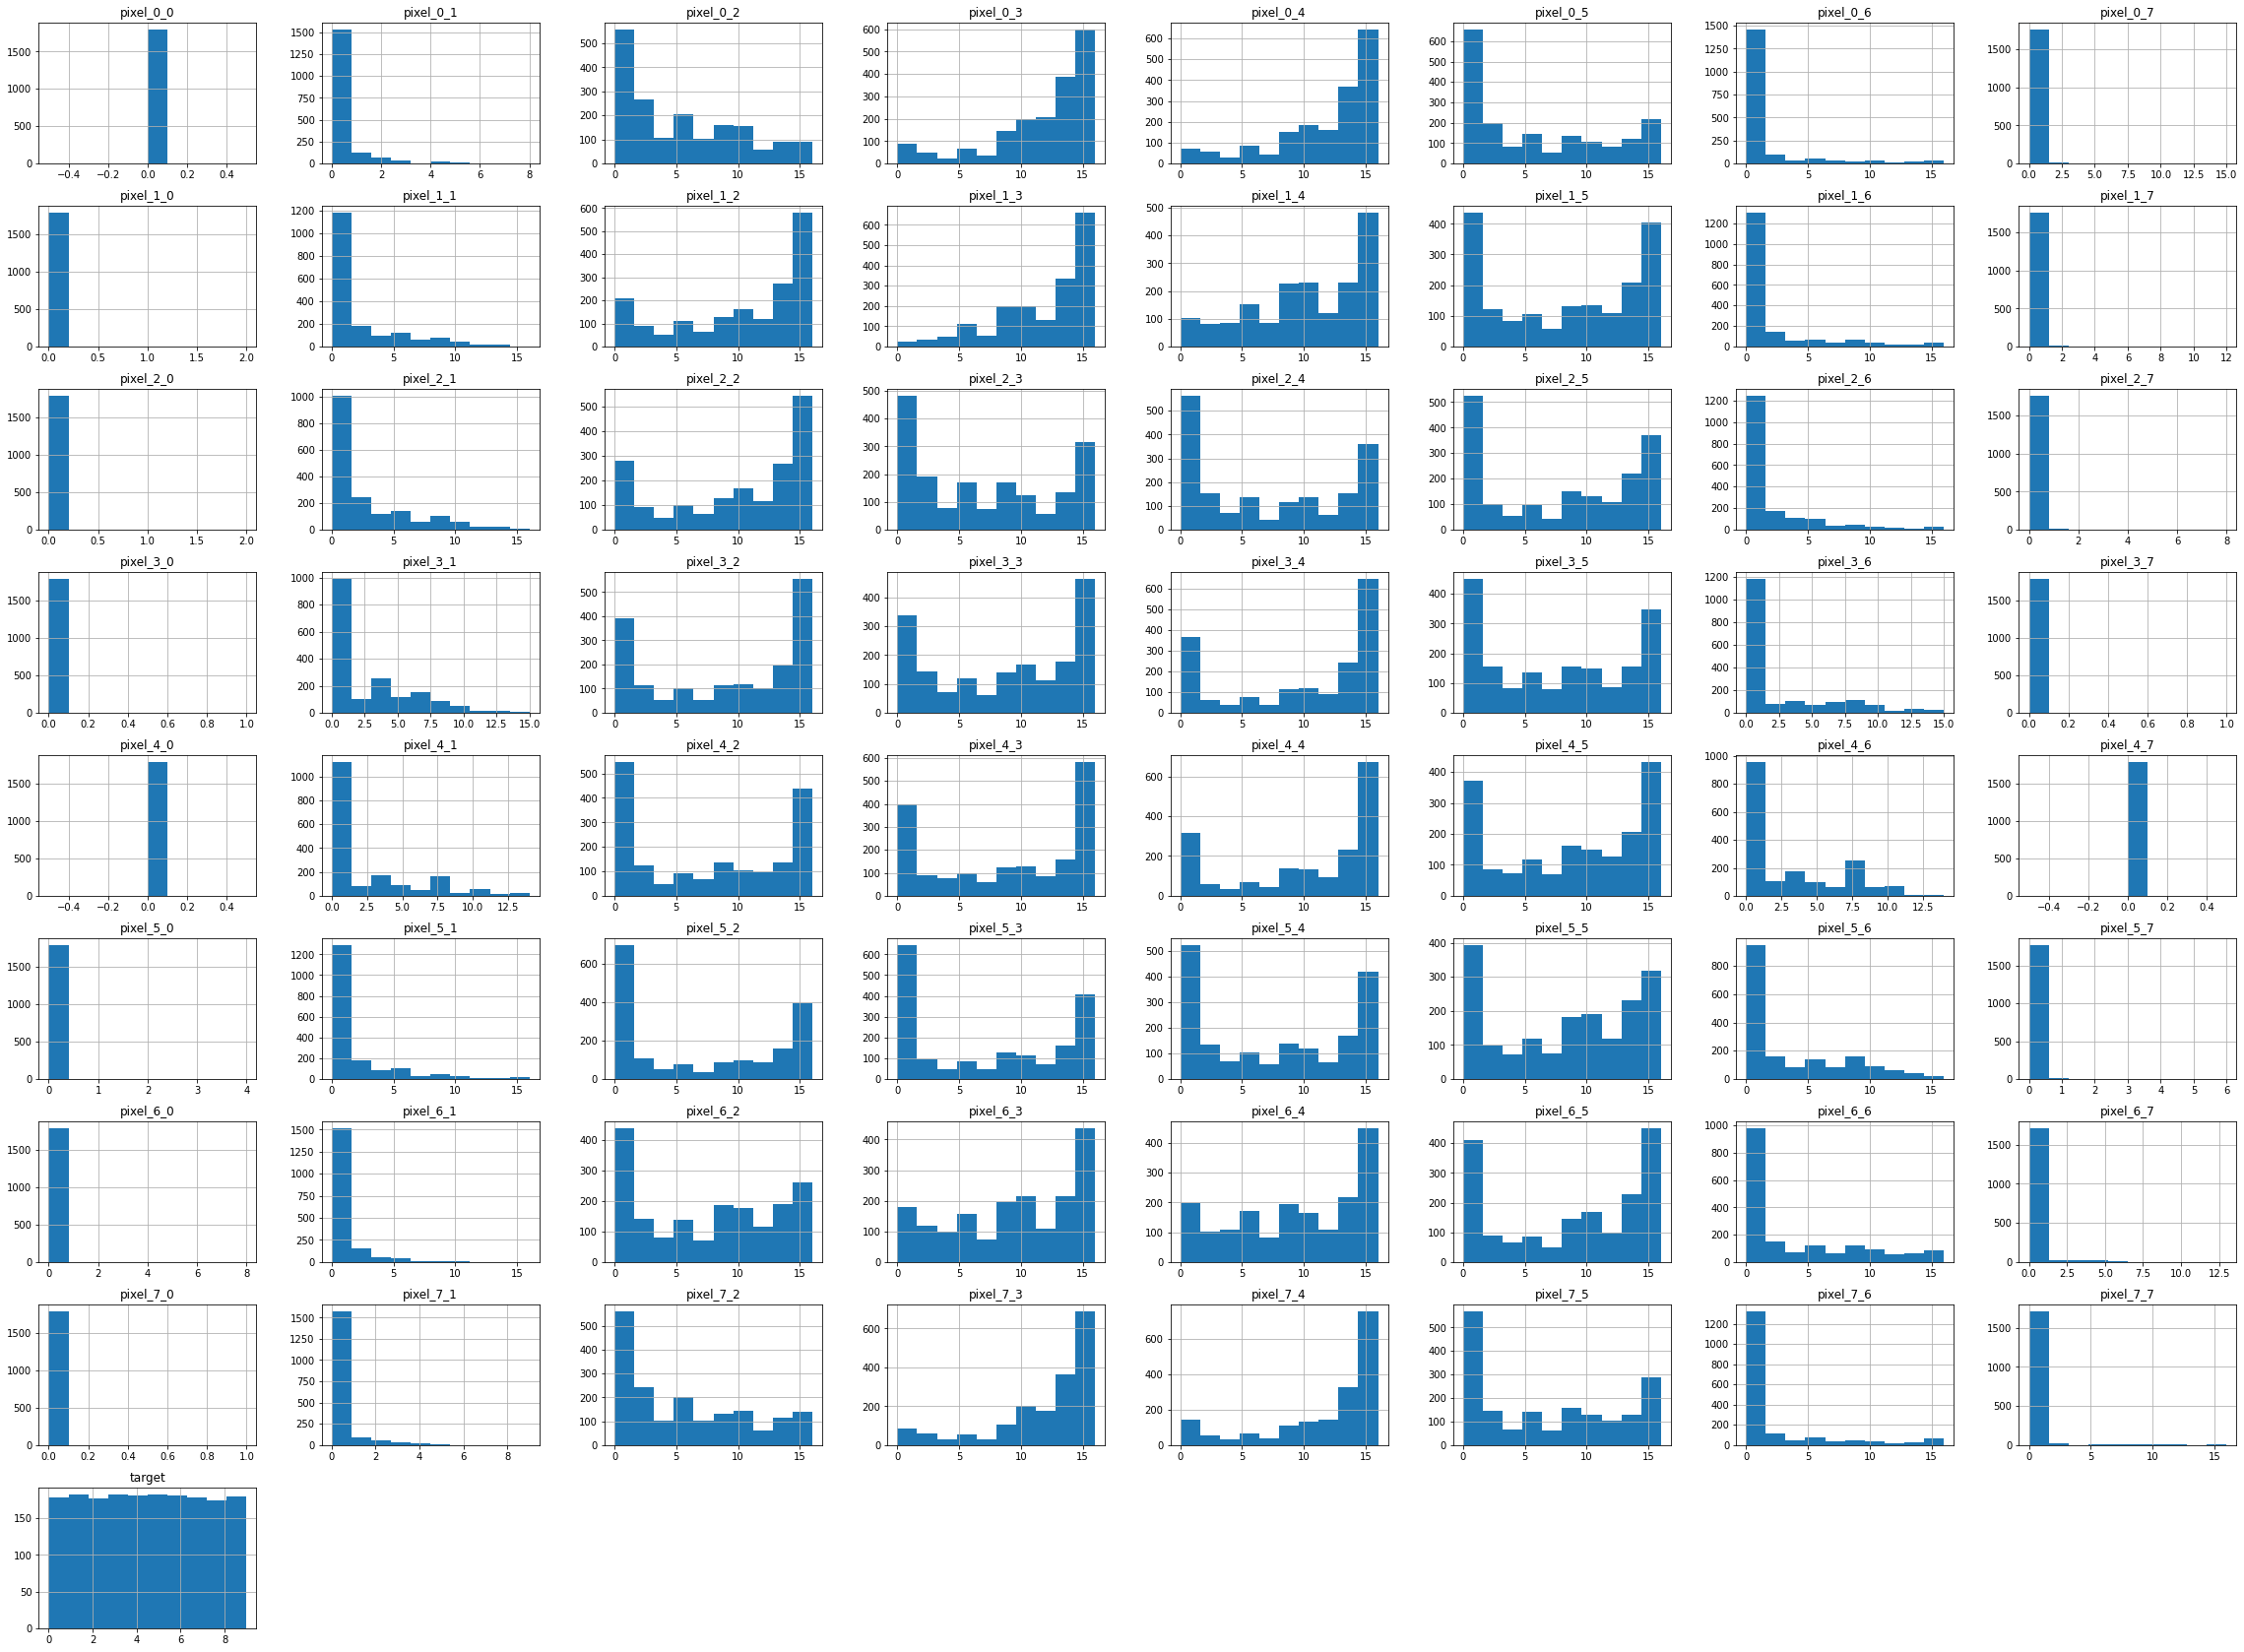

In [7]:
digits_data_merge.hist(figsize=(40,30));

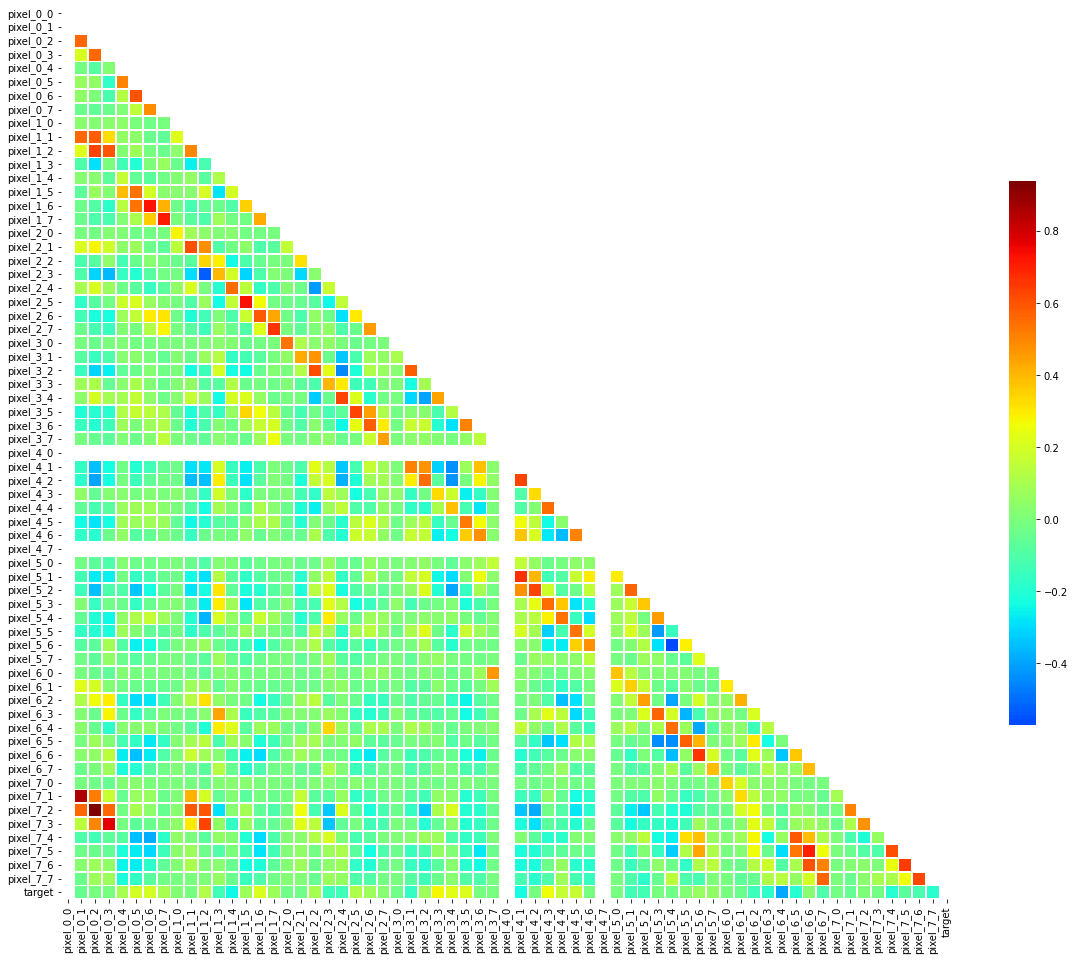

In [8]:
corr = digits_data_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap='jet',  center=0, square=True, linewidths=.8, cbar_kws={"shrink": .5});

#### Vemos cúantos ejemplos tenemos de cada clase en nuestro conjunto de entrenamiento

In [9]:
exemples = dict(zip(list(y_train),[list(y_train).count(i) for i in list(y_train)]))
exemples

{8: 131,
 7: 124,
 1: 132,
 4: 121,
 6: 128,
 2: 130,
 5: 116,
 9: 121,
 0: 125,
 3: 129}

#### Extraemos las etiquetas de las clase a las que vamos a clasificar los ejemplos

In [10]:
clases = [str(v) for v in sorted(np.unique(y_train))]
clases

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

### Visualización del conjunto de datos

#### Visualizamos algunas imágenes de los dígitos que se esconden detrás del conjunto de datos

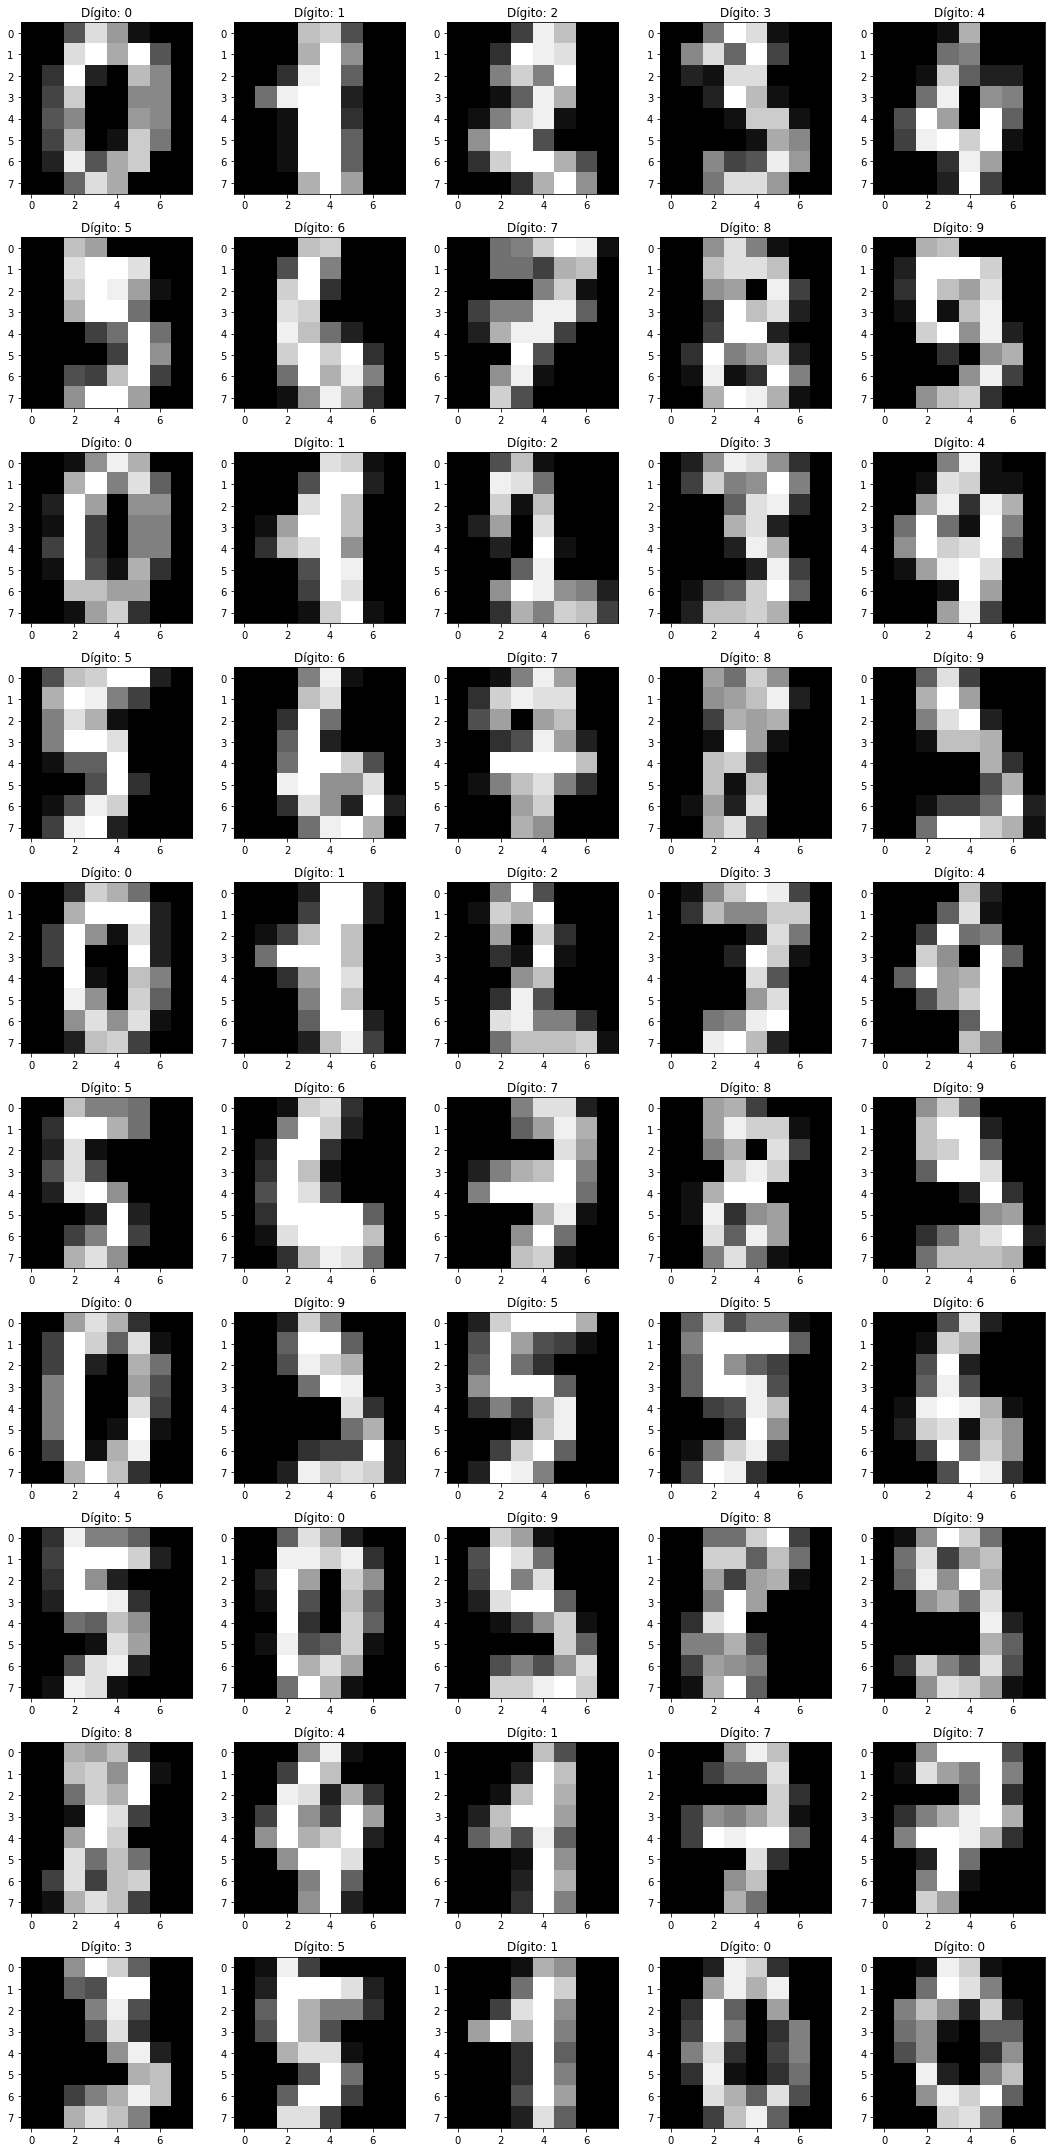

In [11]:
digits_visualize = load_digits()

num = 50
num_row = 10
num_col = 5

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(digits_visualize.images[i], cmap='gray')
    ax.set_title('Dígito: {}'.format(digits_visualize.target[i]))
plt.tight_layout()
plt.show()

#### a) Cargad el conjunto de datos de dígitos dividid los datos en entrenamiento y test (70%/30%) y normalizad los datos a la escala [0,1] adecuadamente (pensad que son imágenes).

##### Ya tenemos los datos cargamos, ahora simplemente falta normalizarlos a la escala [0,1]

In [12]:
X_train_standarized = X_train.copy()
scaler = MinMaxScaler()

X_train_standarized[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_train_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,1257.0,0.000000,0.000000,0.0,0.0000,0.0000,0.0000,0.0
pixel_0_1,1257.0,0.040175,0.114299,0.0,0.0000,0.0000,0.0000,1.0
pixel_0_2,1257.0,0.325726,0.301868,0.0,0.0625,0.2500,0.5625,1.0
pixel_0_3,1257.0,0.737371,0.269531,0.0,0.6250,0.8125,0.9375,1.0
pixel_0_4,1257.0,0.741299,0.265801,0.0,0.6250,0.8125,0.9375,1.0
...,...,...,...,...,...,...,...,...
pixel_7_3,1257.0,0.752486,0.276195,0.0,0.6875,0.8125,1.0000,1.0
pixel_7_4,1257.0,0.742940,0.303820,0.0,0.6250,0.8750,1.0000,1.0
pixel_7_5,1257.0,0.424025,0.366250,0.0,0.0000,0.3750,0.7500,1.0
pixel_7_6,1257.0,0.130121,0.257323,0.0,0.0000,0.0000,0.1250,1.0


In [13]:
X_test_standarized = X_test.copy()

X_test_standarized[X_test.columns] = scaler.transform(X_test[X_test.columns])
X_test_standarized.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel_0_0,540.0,0.000000,0.000000,0.0,0.0000,0.0000,0.000000,0.0
pixel_0_1,540.0,0.032870,0.111213,0.0,0.0000,0.0000,0.000000,1.0
pixel_0_2,540.0,0.324306,0.286230,0.0,0.0625,0.2500,0.515625,1.0
pixel_0_3,540.0,0.745255,0.256212,0.0,0.6250,0.8125,0.937500,1.0
pixel_0_4,540.0,0.738657,0.273165,0.0,0.6250,0.8125,0.937500,1.0
...,...,...,...,...,...,...,...,...
pixel_7_3,540.0,0.762731,0.266957,0.0,0.6875,0.8125,1.000000,1.0
pixel_7_4,540.0,0.726736,0.318714,0.0,0.5625,0.8125,1.000000,1.0
pixel_7_5,540.0,0.419792,0.374958,0.0,0.0000,0.3750,0.750000,1.0
pixel_7_6,540.0,0.127199,0.251968,0.0,0.0000,0.0000,0.125000,1.0


In [14]:
myPCA = PCA().fit(X_train_standarized[X_train.columns]);

#PCA.explained_variance_ratio_ para comprender qué porcentaje de varianza explican los datos
print(myPCA.explained_variance_ratio_)
print(myPCA.explained_variance_ratio_.cumsum())

[1.47728898e-01 1.35192801e-01 1.18940259e-01 8.35113877e-02
 5.57405565e-02 4.85276029e-02 4.19484929e-02 3.58133192e-02
 3.29733750e-02 3.06726737e-02 2.36909223e-02 2.32550364e-02
 1.86825636e-02 1.74469759e-02 1.48649889e-02 1.42963654e-02
 1.32646490e-02 1.19202019e-02 1.01115358e-02 9.45894152e-03
 8.85169589e-03 7.96194650e-03 7.68784361e-03 7.44596300e-03
 6.60297705e-03 5.99707248e-03 5.78658512e-03 5.04933745e-03
 4.98366350e-03 4.42084845e-03 3.98678293e-03 3.91331319e-03
 3.36945664e-03 3.28026941e-03 3.04398739e-03 2.94586732e-03
 2.56951142e-03 2.46775711e-03 2.34637174e-03 2.30392088e-03
 2.13001238e-03 1.84014937e-03 1.57549349e-03 1.53264367e-03
 1.41226336e-03 1.25178256e-03 1.18481817e-03 9.92271926e-04
 9.44910164e-04 8.65905668e-04 5.28780978e-04 5.01137820e-04
 4.09068826e-04 3.80029543e-04 3.45157495e-04 3.28007316e-04
 2.87851124e-04 1.63805881e-04 1.12994011e-04 1.01135446e-04
 5.50636407e-05 1.75060055e-33 7.11423230e-34 6.80136738e-34]
[0.1477289  0.2829217  

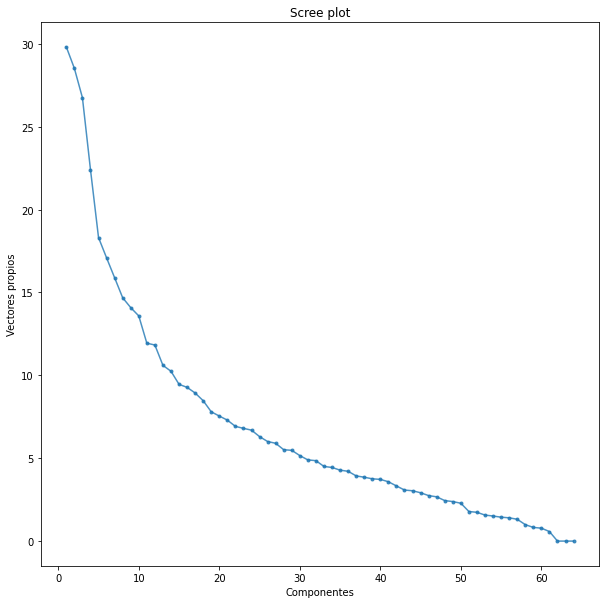

In [15]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.');
#La nueva base son los vectores propios de la matriz de covarianza.
y_label = plt.ylabel('Vectores propios');
x_label = plt.xlabel('Componentes');
plt.title('Scree plot');

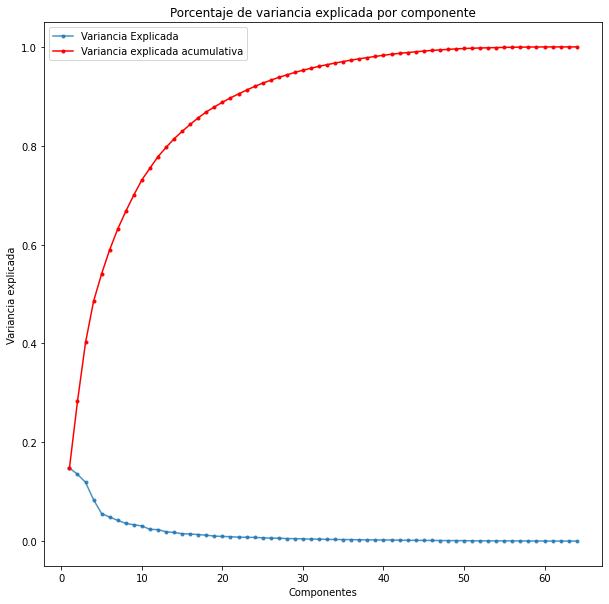

In [16]:
fig = plt.figure(figsize=(10,10));
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

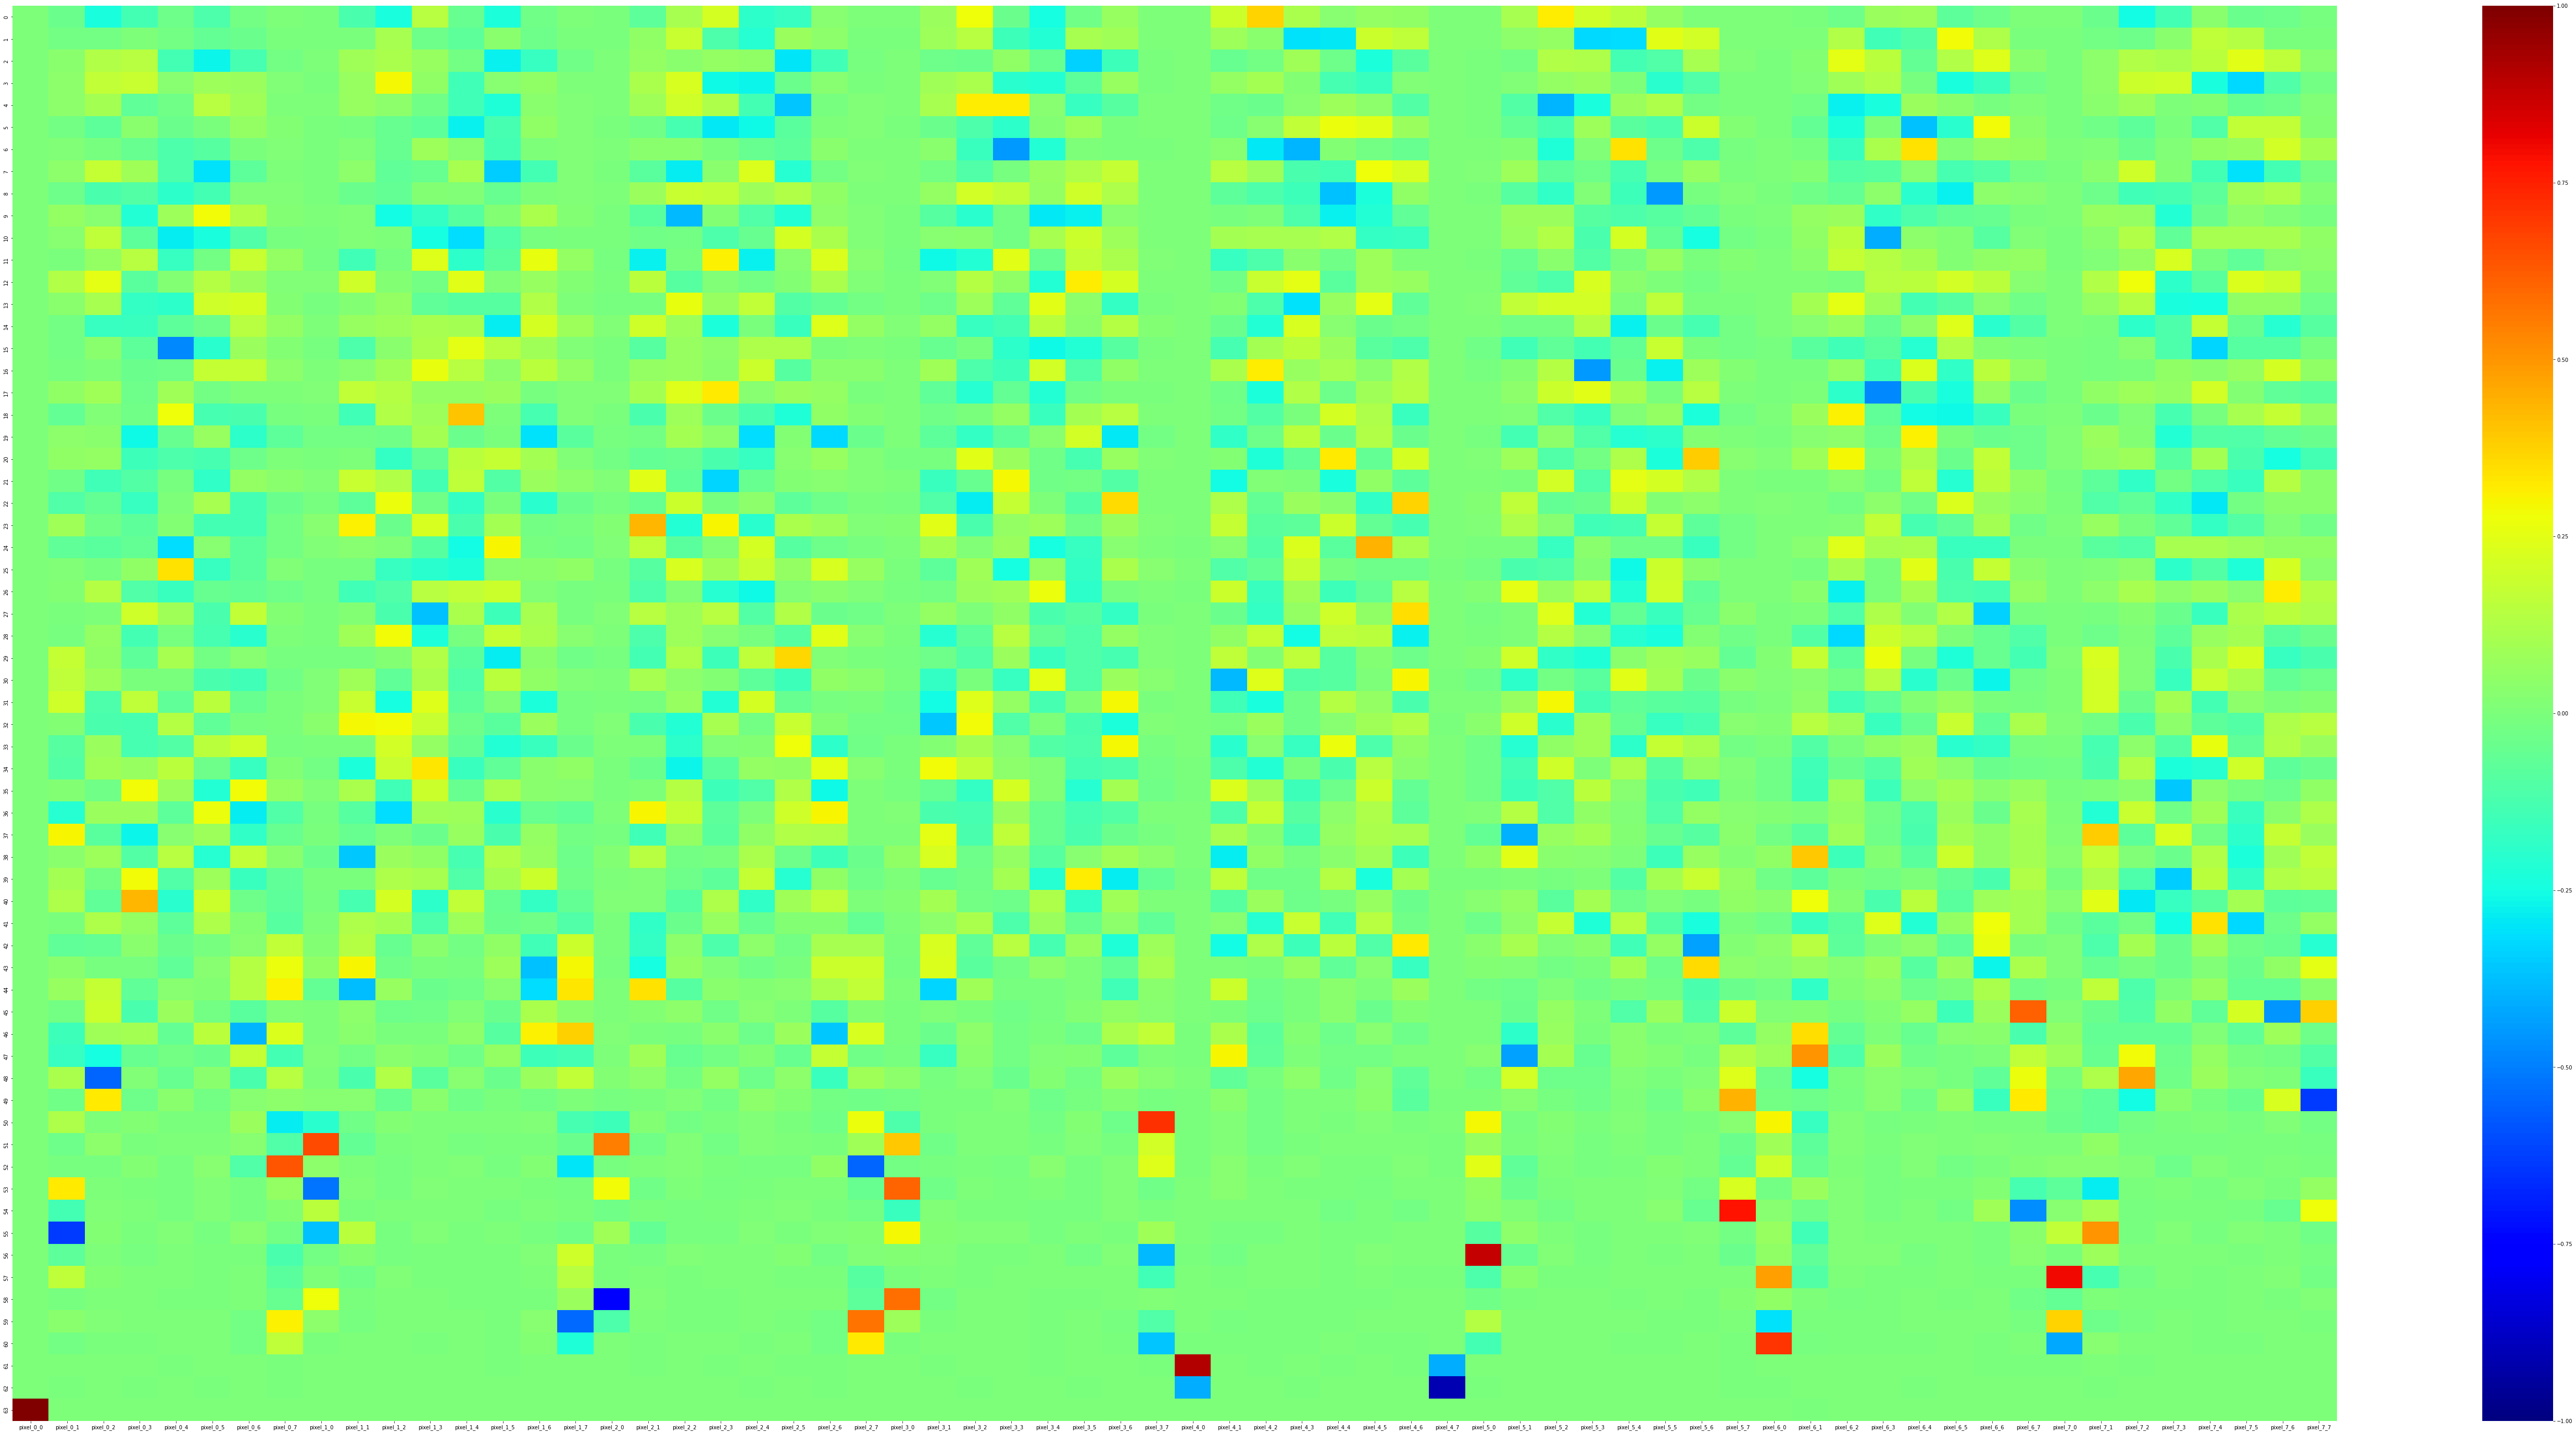

In [17]:
fig, ax = plt.subplots(figsize=(100,50))
sns.heatmap(myPCA.components_, cmap='jet', xticklabels=list(X_train_standarized[X_train.columns]), vmin=-np.max(np.abs(myPCA.components_)), vmax=np.max(np.abs(myPCA.components_)))

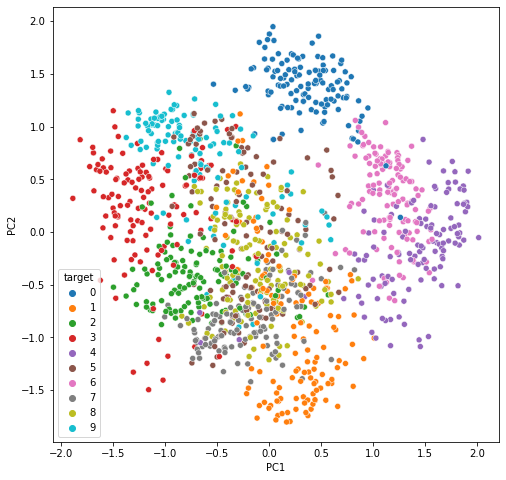

In [18]:
transformed_train = myPCA.transform(X_train_standarized[X_train.columns])
transformed_train

X_train_standarized[['PC1','PC2','PC3']] = transformed_train[:,:3]

fig = plt.figure(figsize=(8,8))
_ = sns.scatterplot(x='PC1', y='PC2', data=X_train_standarized, hue=y_train, palette='tab10')

In [19]:
import plotly.express as px

fig = px.scatter_3d(X_train_standarized, x='PC1', y='PC2', z='PC3',color=y_train)
fig.show()

In [20]:
loadings = myPCA.components_.T * np.sqrt(myPCA.explained_variance_ratio_)

fig = px.scatter(X_train_standarized, x='PC1', y='PC2', color=y_train)

for i, feature in enumerate(X_train.columns):
    fig.add_shape(type='line',x0=0, y0=0,x1=loadings[i, 0],y1=loadings[i, 1])
    fig.add_annotation(x=loadings[i, 0],y=loadings[i, 1],ax=0, ay=0,xanchor="center",yanchor="bottom",text=feature,)
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:982: FutureWarning:

The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.



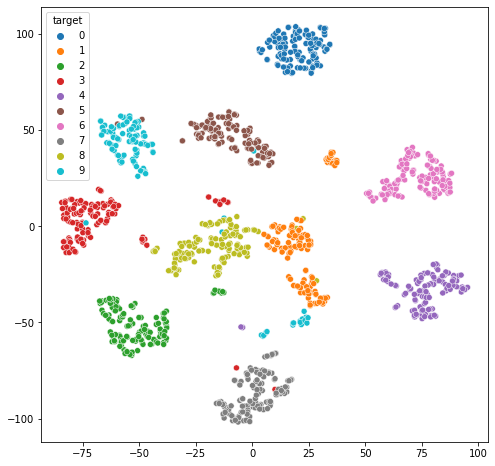

In [21]:
from sklearn.manifold import TSNE

transformed_train = TSNE(n_components=2, perplexity=10, n_iter=2000, init='pca').fit_transform(X_train_standarized[X_train.columns])

fig = plt.figure(figsize=(8,8))
sns.scatterplot(x=transformed_train[:,0], y=transformed_train[:,1], hue=y_train, palette='tab10');

#### b) Fijad el tamaño de la capa intermedia a 2 y experimentad con algunos tamaños para las otras capas ocultas (siempre una potencia de 2) usando como funciones de activación $\texttt{linear, sigmoid y relu}$. Para mantener bajo el tiempo de entrenamiento, el tamaño del lote puede ser grande (alrededor de 100), el número de épocas debe ser del orden de miles, usad los experimentos con la función de activación lineal para fijar estos valores.
#### Calculad el error cuadrático (MSE) final después de entrenar las redes para los datos de entrenamiento y los datos de test como la media de las diferencias cuadráticas entre los datos y las predicciones.

dict_keys(['loss', 'val_loss'])


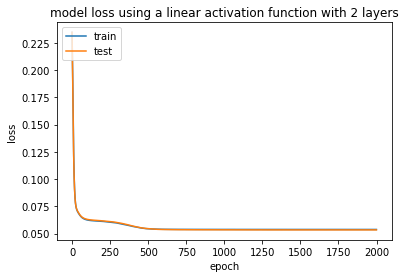

17/17 [==============================] - 0s 1ms/step
Nb layers: 2
train_error: 0.05369157855155917
test_error: 0.05378833030119608
best train_loss epoch result: 1971
best train_loss loss result: 0.053817689418792725
best val_loss epoch result: 1831
best val_loss loss result: 0.05340198799967766
dict_keys(['loss', 'val_loss'])


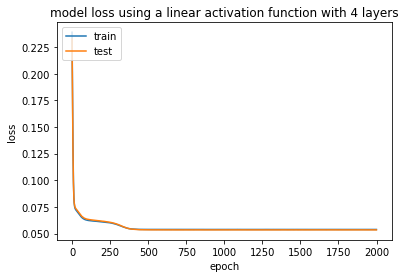

17/17 [==============================] - 0s 1ms/step
Nb layers: 4
train_error: 0.05369659668354976
test_error: 0.05377200833425204
best train_loss epoch result: 1755
best train_loss loss result: 0.053818125277757645
best val_loss epoch result: 1672
best val_loss loss result: 0.05340800806879997
dict_keys(['loss', 'val_loss'])


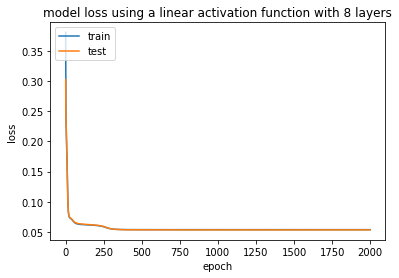

17/17 [==============================] - 0s 1ms/step
Nb layers: 8
train_error: 0.05369900538346559
test_error: 0.0537719555778183
best train_loss epoch result: 1695
best train_loss loss result: 0.053824543952941895
best val_loss epoch result: 599
best val_loss loss result: 0.05338983237743378
dict_keys(['loss', 'val_loss'])


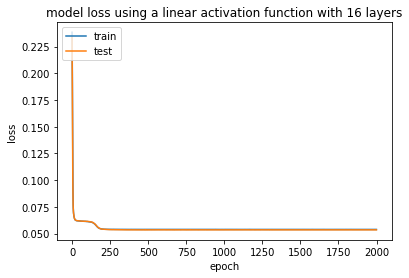

17/17 [==============================] - 0s 1ms/step
Nb layers: 16
train_error: 0.05370473162444546
test_error: 0.05375901198851889
best train_loss epoch result: 1177
best train_loss loss result: 0.053829167038202286
best val_loss epoch result: 483
best val_loss loss result: 0.05340093746781349
dict_keys(['loss', 'val_loss'])


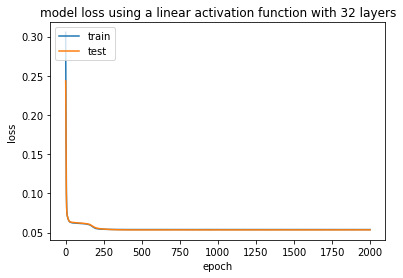

17/17 [==============================] - 0s 2ms/step
Nb layers: 32
train_error: 0.0537037132365063
test_error: 0.05377160155587439
best train_loss epoch result: 1911
best train_loss loss result: 0.05383387580513954
best val_loss epoch result: 469
best val_loss loss result: 0.053394634276628494
dict_keys(['loss', 'val_loss'])


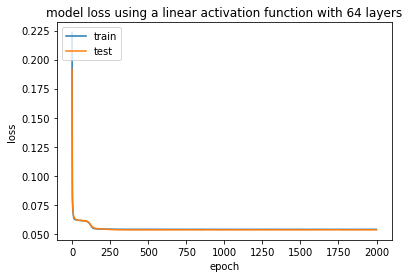

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.05371782638441402
test_error: 0.05375025337775301
best train_loss epoch result: 1825
best train_loss loss result: 0.0538373664021492
best val_loss epoch result: 984
best val_loss loss result: 0.05339526757597923


In [22]:
#Pruebas para tener la mejor red lineal

#linear

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 2000 #mas epochs mejor? falta probar valores más altos
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'linear' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))


dict_keys(['loss', 'val_loss'])


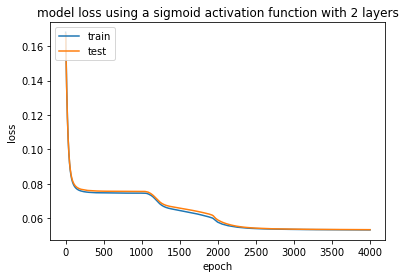

17/17 [==============================] - 0s 1ms/step
Nb layers: 2
train_error: 0.05313631812709885
test_error: 0.05347685906130145
best train_loss epoch result: 3992
best train_loss loss result: 0.053095050156116486
best val_loss epoch result: 3997
best val_loss loss result: 0.05323013290762901
dict_keys(['loss', 'val_loss'])


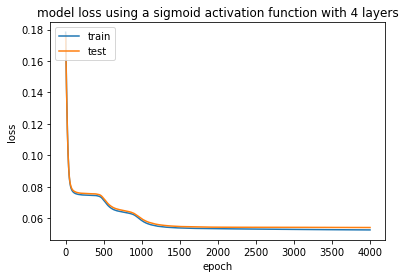

17/17 [==============================] - 0s 1ms/step
Nb layers: 4
train_error: 0.053080209499477726
test_error: 0.05323731732295351
best train_loss epoch result: 3993
best train_loss loss result: 0.05262571573257446
best val_loss epoch result: 3987
best val_loss loss result: 0.05414721742272377
dict_keys(['loss', 'val_loss'])


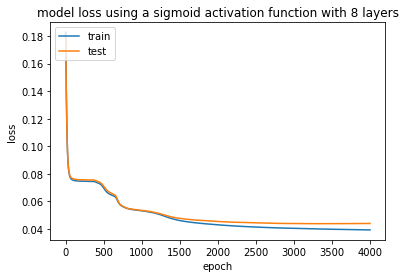

17/17 [==============================] - 0s 1ms/step
Nb layers: 8
train_error: 0.04065105617380903
test_error: 0.04272780638626967
best train_loss epoch result: 3999
best train_loss loss result: 0.03925172612071037
best val_loss epoch result: 3402
best val_loss loss result: 0.04378005862236023
dict_keys(['loss', 'val_loss'])


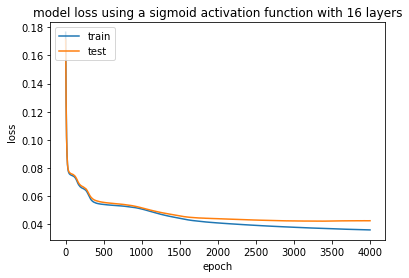

17/17 [==============================] - 0s 1ms/step
Nb layers: 16
train_error: 0.03799443552119755
test_error: 0.04194801429216409
best train_loss epoch result: 3998
best train_loss loss result: 0.03604110702872276
best val_loss epoch result: 3324
best val_loss loss result: 0.042256712913513184
dict_keys(['loss', 'val_loss'])


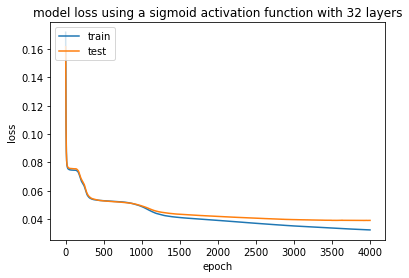

17/17 [==============================] - 0s 2ms/step
Nb layers: 32
train_error: 0.03449789935535206
test_error: 0.03759599421050184
best train_loss epoch result: 3999
best train_loss loss result: 0.03249179571866989
best val_loss epoch result: 3884
best val_loss loss result: 0.03912960737943649
dict_keys(['loss', 'val_loss'])


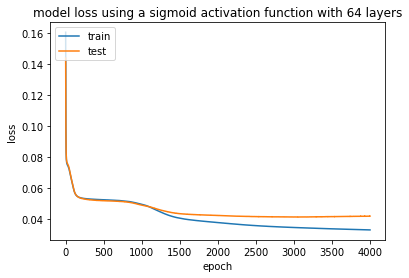

17/17 [==============================] - 0s 2ms/step
Nb layers: 64
train_error: 0.0359102009470826
test_error: 0.04037836253888494
best train_loss epoch result: 3999
best train_loss loss result: 0.033261388540267944
best val_loss epoch result: 3055
best val_loss loss result: 0.041547998785972595


In [26]:
#Pruebas para tener la mejor red sigmoid

#sigmoid

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 4000 #con 2000 epochs aun no es suficiente subirlas más! 4000? parece que no es suficiente Probamos con 5000?
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'sigmoid' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

dict_keys(['loss', 'val_loss'])


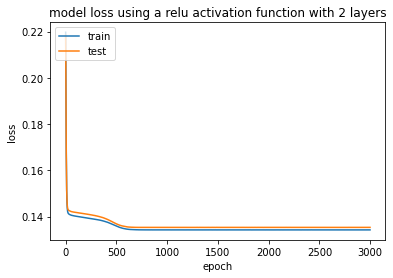

17/17 [==============================] - 0s 1ms/step
Nb layers: 2
train_error: 0.13454166743939705
test_error: 0.13476975257535187
best train_loss epoch result: 2988
best train_loss loss result: 0.13421407341957092
best val_loss epoch result: 942
best val_loss loss result: 0.13528381288051605
dict_keys(['loss', 'val_loss'])


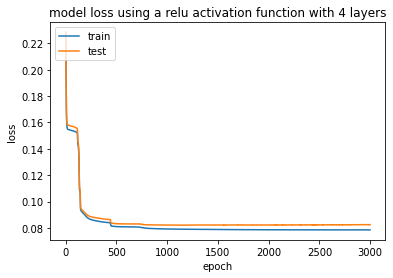

17/17 [==============================] - 0s 1ms/step
Nb layers: 4
train_error: 0.07964921145081422
test_error: 0.0804100300379712
best train_loss epoch result: 2928
best train_loss loss result: 0.07846780121326447
best val_loss epoch result: 1055
best val_loss loss result: 0.08205496519804001
dict_keys(['loss', 'val_loss'])


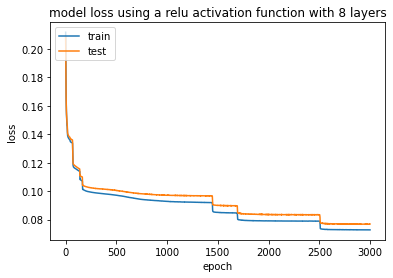

17/17 [==============================] - 0s 3ms/step
Nb layers: 8
train_error: 0.07395053007978405
test_error: 0.07355704815746616
best train_loss epoch result: 2988
best train_loss loss result: 0.07272232323884964
best val_loss epoch result: 2965
best val_loss loss result: 0.07665340602397919
dict_keys(['loss', 'val_loss'])


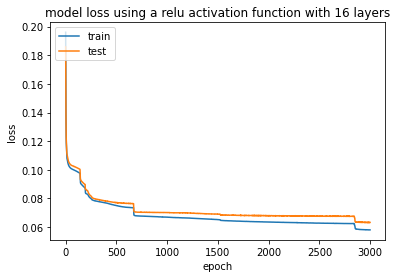

17/17 [==============================] - 0s 1ms/step
Nb layers: 16
train_error: 0.059573750216955094
test_error: 0.06287334588450359
best train_loss epoch result: 2989
best train_loss loss result: 0.05802886560559273
best val_loss epoch result: 2972
best val_loss loss result: 0.06315568089485168
dict_keys(['loss', 'val_loss'])


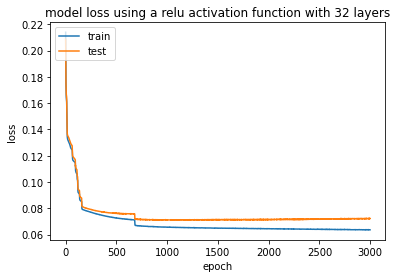

17/17 [==============================] - 0s 2ms/step
Nb layers: 32
train_error: 0.0662002018616917
test_error: 0.06811448571069109
best train_loss epoch result: 2978
best train_loss loss result: 0.06360078603029251
best val_loss epoch result: 1197
best val_loss loss result: 0.07107638567686081
dict_keys(['loss', 'val_loss'])


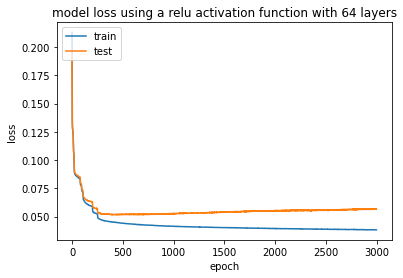

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.043715106326189884
test_error: 0.05476730023387092
best train_loss epoch result: 2997
best train_loss loss result: 0.03819689899682999
best val_loss epoch result: 427
best val_loss loss result: 0.0516710989177227


In [36]:
#Pruebas para tener la mejor red relu

#relu

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3000 #mas epochs mejor? falta probar valores más altos
BATCH_SIZE = 100
sizes_int_layer = [2,4,8,16,32,64]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'relu' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

##### b.1) Para cada función de activación, para la red con el mejor error cuadrático, representad las predicciones 2D para los datos de entrenamiento usando la red $\texttt{codificador}$. ¿Alguna de las funciones de activación ayuda a la separabilidad de las clases en 2D? Calculad el PCA de los datos y comparad los resultados de los primeros 2 componentes con los resultados del codificador. ¿Alguna de las redes produce una salida similar? Buscad en Google la relación entre PCA y auto-codificadores y explicad brevemente lo que encontréis.

Linear -> Con 16 capas ocultas parece que tenemos un buen resultado con 2000 epochs

Sigmoid -> Con 32 capas parece que tenemos un buen resultado pero falta incrementar las epochs, con 4000 no nos basta, aunque tenemos un resultado bastante bueno



dict_keys(['loss', 'val_loss'])


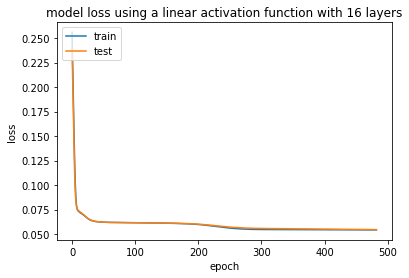

17/17 [==============================] - 0s 2ms/step
Nb layers: 16
train_error: 0.054205571125252205
test_error: 0.05492705350120481
best train_loss epoch result: 482
best train_loss loss result: 0.0541522391140461
best val_loss epoch result: 481
best val_loss loss result: 0.05437973141670227


In [28]:
#Pruebas para tener la mejor red lineal obtenidos del apartado anterior

#linear

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 483 
BATCH_SIZE = 100
sizes_int_layer = [16]#,8,16,32]#,8,16,32,...] #probar a tener capas mas grandes
act = 'linear' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

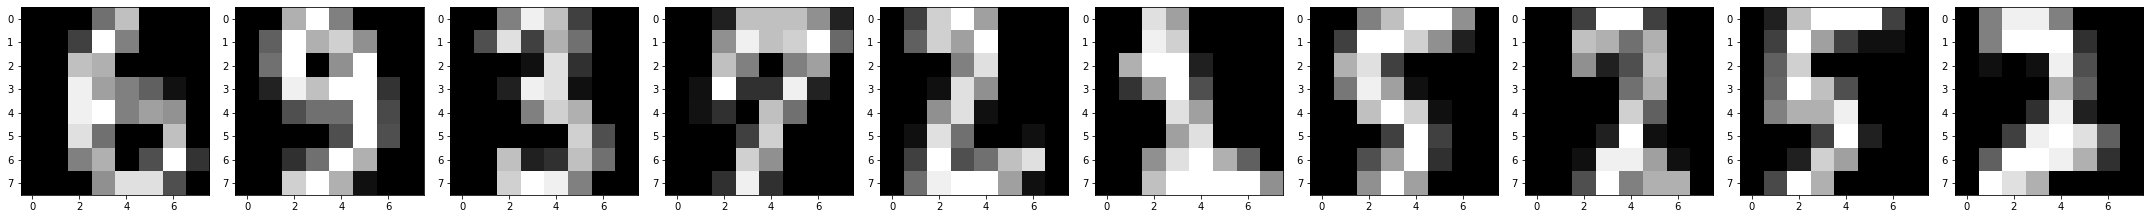

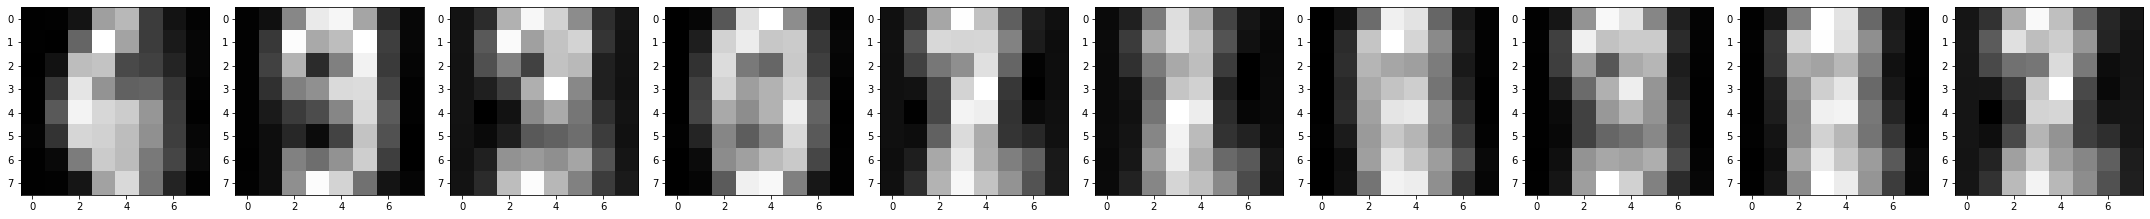

In [29]:
#lineal
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

dict_keys(['loss', 'val_loss'])


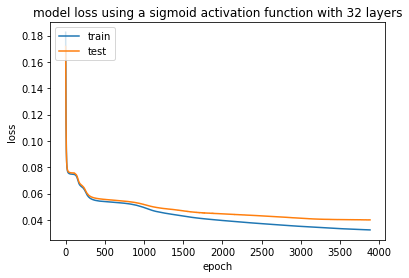

17/17 [==============================] - 0s 1ms/step
Nb layers: 32
train_error: 0.034632923630489684
test_error: 0.03904227024880221
best train_loss epoch result: 3882
best train_loss loss result: 0.03235574811697006
best val_loss epoch result: 3867
best val_loss loss result: 0.03994274139404297


In [32]:
#Pruebas para tener la mejor red sigmoid

#sigmoid

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 3884 #falta probar valores más altos
BATCH_SIZE = 100
sizes_int_layer = [32]
act = 'sigmoid' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

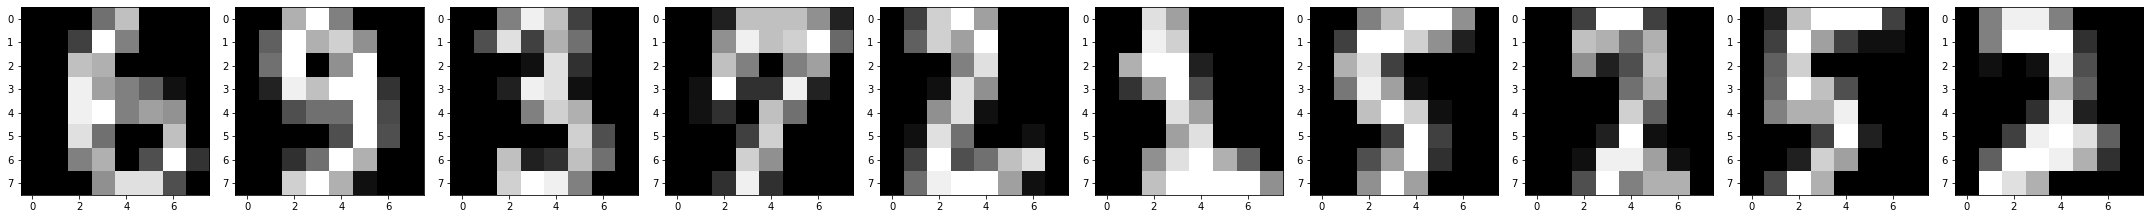

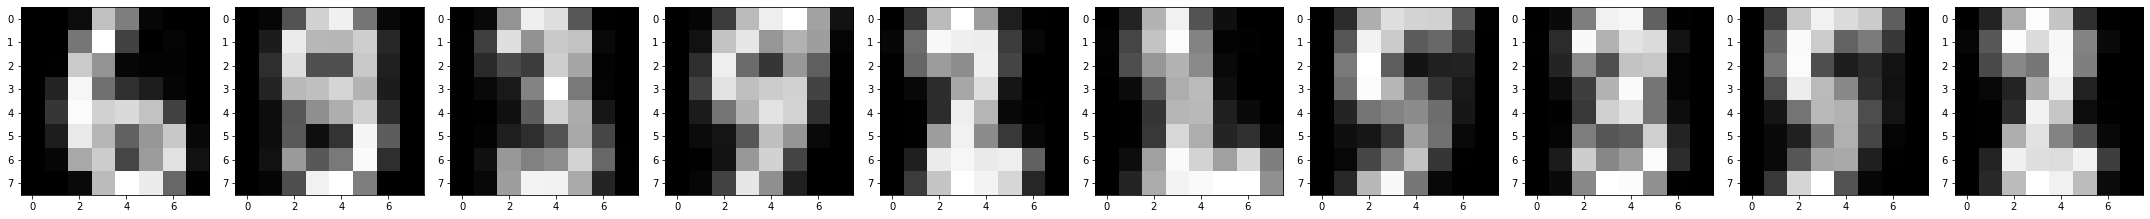

In [33]:
#sigmoid
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

dict_keys(['loss', 'val_loss'])


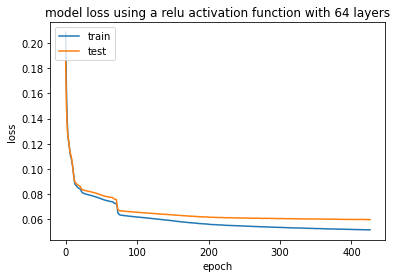

17/17 [==============================] - 0s 1ms/step
Nb layers: 64
train_error: 0.05410289510159296
test_error: 0.057709693841156796
best train_loss epoch result: 425
best train_loss loss result: 0.05168535187840462
best val_loss epoch result: 424
best val_loss loss result: 0.05980515480041504


In [37]:
#Pruebas para tener la mejor red relu

#relu

#falta normalitzar les dades que sinó el loss sortia escalat
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

EPOCHS = 427
BATCH_SIZE = 100
sizes_int_layer = [64]
act = 'relu' 

train_error = list(range(len(sizes_int_layer)))
test_error = list(range(len(sizes_int_layer)))

for i, intermediate in enumerate(sizes_int_layer):
    entrada = keras.Input(shape=(64,))
    codificar = keras.layers.Dense(intermediate, activation=act)(entrada)
    codificar = keras.layers.Dense(2, activation=act)(codificar) #fijar d2 a 2
    decodificar = keras.layers.Dense(intermediate, activation=act)(codificar)
    decodificar = keras.layers.Dense(64, activation=act)(decodificar)
    autocodificador = keras.Model(entrada, decodificar)
    codificador = keras.Model(entrada, codificar)

    autocodificador.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError())
    #mirar a poque el X_test no coge los datos normalizados cuando uso el #validation_data=(X_test, y_test)
    history = autocodificador.fit(X_train, X_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=False, validation_split=0.3)#validation_data=(X_test, y_test))

    print(history.history.keys())

    #plot de loss
    plt.plot(history.history['loss'])
    # this error happens when we are not providing validation data to the model, And check the parameters of the model.fit_generator(or model.fit)
    #(train_data, steps_per_epoch,validation_data, validation_steps, epochs,initial_epoch, callbacks)
    plt.plot(history.history['val_loss'])
    plt.title("model loss using a "+act+" activation function with "+str(intermediate)+" layers")
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    #.predict
    X_train_pred = autocodificador.predict(X_train)
    X_test_pred = autocodificador.predict(X_test)

    #calcular el MSE després d'entrenar les xarxes per les dades d'entrament i test com la 
    #mitja de les diferències quadràtiques entres les dades i les prediccions
    train_er = mean_squared_error(X_train, X_train_pred)
    test_er = mean_squared_error(X_test, X_test_pred)

    train_error[i] = train_er
    test_error[i] = test_er

    #MSE i número de capas
    print("Nb layers:", intermediate)
    print("train_error:", train_er)
    print("test_error:", test_er)

    #training data
    print("best train_loss epoch result:", history.history['loss'].index(min(history.history['loss'])))
    print("best train_loss loss result:", min(history.history['loss']))

    #cross-validation data
    print("best val_loss epoch result:", history.history['val_loss'].index(min(history.history['val_loss'])))
    print("best val_loss loss result:", min(history.history['val_loss']))

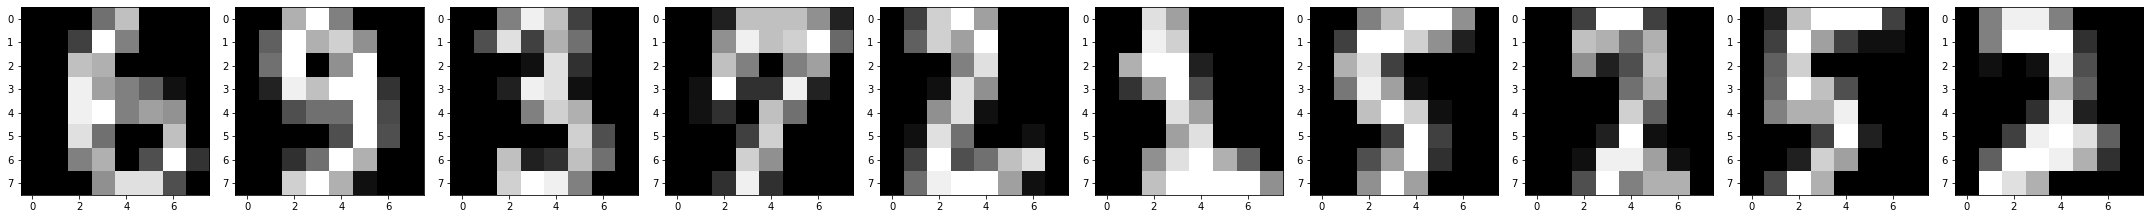

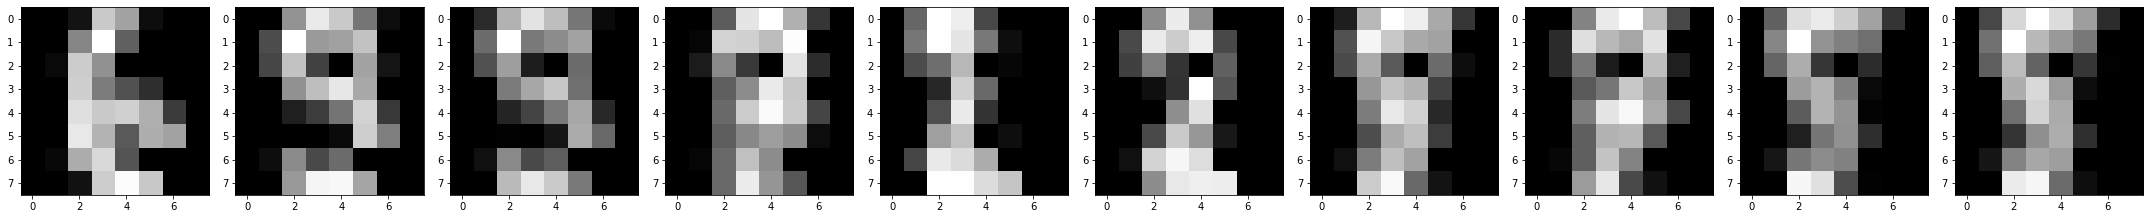

In [38]:
#relu
X_test = X_test.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

#Predichos por la red
X_test_pred = X_test_pred.reshape(-1, 8, 8)

num = 10
num_row = 1
num_col = 10

fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,3*num_row))
for i in range(num):
    ax = axes[i%num_col]
    ax.imshow(X_test_pred[:num][i], cmap='gray')
plt.tight_layout()
plt.show()

In [ ]:
#PCA for linear activation function



##### b.2) Calculad la codificación para algunos ejemplos de los datos de test utilizando la mejor red y representad los resultados. ¿La salida es similar a la entrada?

Está representado debajo de cada salida de la mejor red para cada función de activación.

https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

file:///Users/mac/Downloads/ProblemaLlista3-MNIST-MartaGraneroMarti.html

file:///Users/mac/Downloads/ProblemaLlista2-BCMBotorIBEX35-MartaGraneroMarti.html